In [3]:
simId = 105
processTag = "excl_anomTtbar_QED.root"
# processTag = "excl_Ttbar_QED.root"
#SM_ttbar_filename = "/eos/home-a/abellora/SWAN_projects/TopPheno/MadGraph/MG5_aMC_v3_1_0/SM_ttbar/Events/run_02/tag_1_delphes_events.root"

In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

def plotWithRange(variable,nbins,xmin,xmax,xlabel="",histlabel="",axis=None):
    binWidth=(float)(xmax-xmin)/nbins
    ax = axis
    if axis==None:
        fig,ax = plt.subplots(1,figsize=(15,10))
        
    binEdges=[xmin+i*binWidth for i in range(nbins+1)]
    y, bin_edges,patches = ax.hist(variable, bins=binEdges,histtype="step",label=histlabel)
    plt.xlabel(xlabel,fontsize=20)
    plt.xlim([xmin,xmax])
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(
        bin_centers,
        y,
        yerr = y**0.5,
        marker = '.',
        linestyle = 'None',
        drawstyle = 'steps-mid',
        color=patches[0].get_edgecolor()
    )
    if histlabel != "":
        plt.legend(fontsize=20)
    return ax

In [11]:
# for SM ttbar
file = uproot.open(SM_ttbar_filename)
tree = file["Delphes"]
tree.show()

NameError: name 'SM_ttbar_filename' is not defined

In [6]:
# for BSM ttbar
file = uproot.open("DELPHES/"+str(simId)+"/"+processTag)
tree = file["Delphes"]
tree.show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ScalePDF             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQCD             TStreamerBasicType         asjagged(asdtype('>f4'))

Event_size                 (no streamer)              asdtype

In [7]:
branchSelection = ["Particle.PID","Particle.Status","Particle.M*","*.P*","*.PT","*.E","*.Eta","*.Phi","*.Mass","*.Flavor","*.BTag","*.MET","*P4[5]","*_size"]
events = tree.lazyarrays(branchSelection,namedecode="utf-8")

In [30]:
for event in events:
    print((event["Particle.PID"] == 6) & ((event["Particle.Status"] == 123) | (event["Particle.Status"] == 124) | (event["Particle.Status"] == 22)) )
    break

[False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [5]:
print(events.keys())
n_events=len(events["Particle.PID"])
initial_n_events=len(events["Particle.PID"])

dict_keys(['Particle.PID', 'Particle.Status', 'Particle.M1', 'Particle.M2', 'Particle.Mass', 'Event.ProcTime', 'Event.ProcessID', 'Particle.Px', 'Particle.Py', 'Particle.Pz', 'Particle.P', 'Particle.PT', 'Particle.Phi', 'Track.PID', 'Track.P', 'Track.PT', 'Track.Phi', 'Track.PhiOuter', 'Track.Particle', 'Tower.Phi', 'Tower.Particles', 'EFlowTrack.PID', 'EFlowTrack.P', 'EFlowTrack.PT', 'EFlowTrack.Phi', 'EFlowTrack.PhiOuter', 'EFlowTrack.Particle', 'EFlowPhoton.Phi', 'EFlowPhoton.Particles', 'EFlowNeutralHadron.Phi', 'EFlowNeutralHadron.Particles', 'GenJet.PT', 'GenJet.Phi', 'GenJet.PTD', 'GenJet.PrunedP4[5]', 'GenJet.Particles', 'GenMissingET.Phi', 'Jet.PT', 'Jet.Phi', 'Jet.PTD', 'Jet.PrunedP4[5]', 'Jet.Particles', 'Electron.PT', 'Electron.Phi', 'Electron.Particle', 'Photon.PT', 'Photon.Phi', 'Photon.Particles', 'Muon.PT', 'Muon.Phi', 'Muon.Particle', 'FatJet.PT', 'FatJet.Phi', 'FatJet.PTD', 'FatJet.PrunedP4[5]', 'FatJet.Particles', 'MissingET.Phi', 'Particle.E', 'Tower.E', 'EFlowPhoto

In [15]:
# Reconstruct the gen level xi
gen_P_pos_sel = (events["Particle.PID"] == 2212) & (events["Particle.Pz"] > 3000) & (events["Particle.Status"] == 1)
events["gen_xi_pos"] = 1 - events["Particle.E"][gen_P_pos_sel]/7000.
gen_P_neg_sel = (events["Particle.PID"] == 2212) & (events["Particle.Pz"] < -3000) & (events["Particle.Status"] == 1)
events["gen_xi_neg"] = 1 - np.abs(events["Particle.E"][gen_P_neg_sel]/7000.)

# Find events with out-of-range xi values and remove them
counter = 0
not_weird_xi = []
for i in range(len(events["Particle.Pz"][gen_P_pos_sel])):
    if len(events["gen_xi_pos"][i]) > 0 and len(events["gen_xi_neg"][i]) > 0:
        if events["gen_xi_pos"][i] > 0.2 or events["gen_xi_pos"][i] < 0.015 or events["gen_xi_neg"][i] > 0.2 or events["gen_xi_neg"][i] < 0.015:
            counter += 1
            not_weird_xi.append(False)
        else:
            not_weird_xi.append(True)
    else:
        counter += 1
        not_weird_xi.append(False)
print("Found {:.1f}% weird xi events".format(counter/n_events*100))
for key in events:
        events[key] = events[key][not_weird_xi]
n_events=len(events["Particle.PID"])
events["gen_xi_pos"] = np.array(events["gen_xi_pos"].flatten())
events["gen_xi_neg"] = np.array(events["gen_xi_neg"].flatten())

Found 1.7% weird xi events


<AxesSubplot:xlabel='$\\xi_{negative}$'>

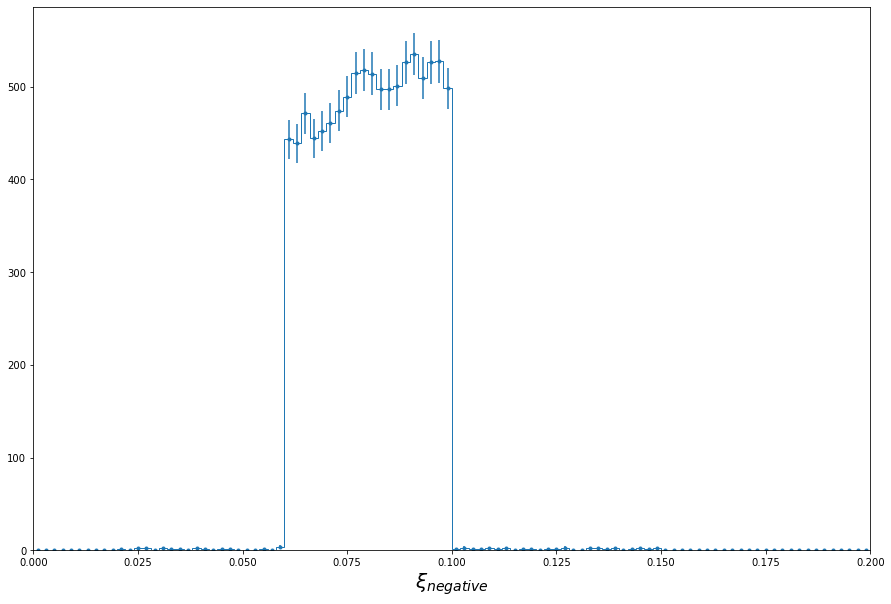

In [18]:
# Plot xi negative
plotWithRange(events["gen_xi_neg"],100,0,0.2,r"$\xi_{negative}$")

In [19]:
# Compute the central mass from the gen protons
events["m_protons"] = 14000 * np.sqrt(events["gen_xi_pos"] * events["gen_xi_neg"])

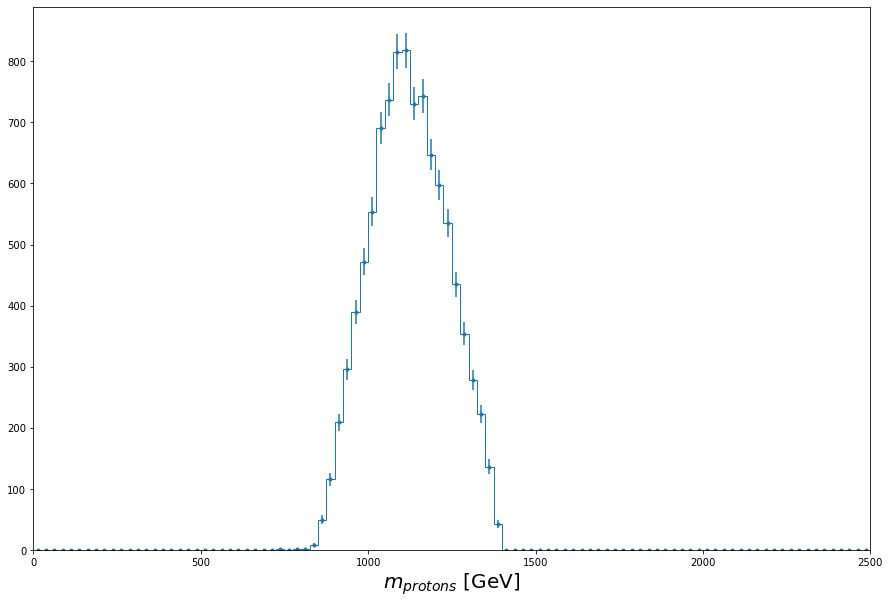

In [20]:
# Plot m_protons
f=plotWithRange(events["m_protons"],100,0,2500,r"$m_{protons}$ [GeV]")

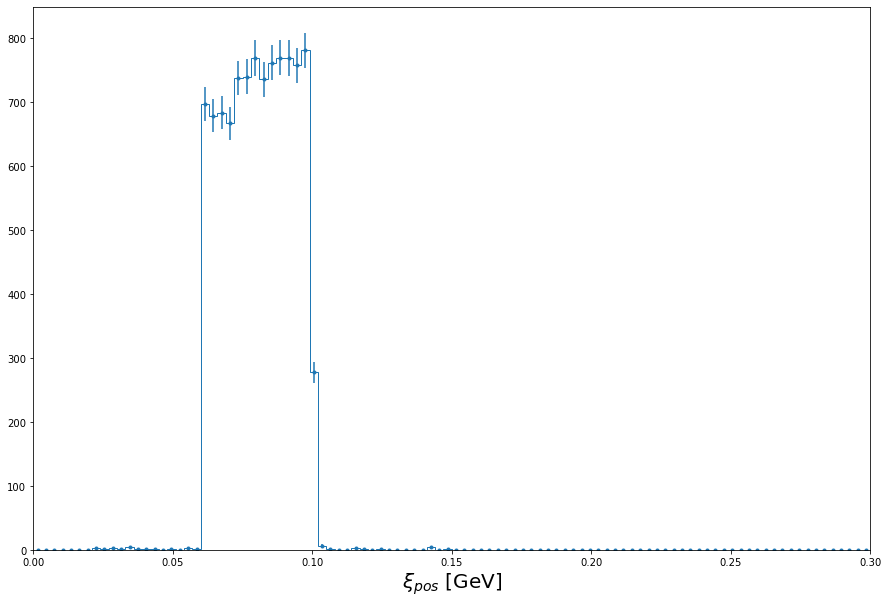

In [22]:
f=plotWithRange(events["gen_xi_pos"],100,0,0.3,r"$\xi_{pos}$ [GeV]")

In [17]:
import uproot_methods # Needed for TLorentzVector

In [21]:
events["Particle.Status"][events["Particle.PID"] == 6]

<JaggedArray [[22 44 44 ... 52 52 62] [22 44 44 ... 44 52 62] [22 44 44 ... 44 52 62] ... [22 44 44 44 52 62] [22 44 44 ... 52 52 62] [22 44 44 ... 52 44 62]] at 0x7f61c965cbb0>

In [18]:
# Select the gen level tops
gen_top1_sel = (events["Particle.PID"] == 6) & ((events["Particle.Status"] == 123) | (events["Particle.Status"] == 124) | (events["Particle.Status"] == 22))
gen_top2_sel = (events["Particle.PID"] == -6 ) & ((events["Particle.Status"] == 123) | (events["Particle.Status"] == 124) | (events["Particle.Status"] == 22))

before_n = len(events["Particle.PID"])
# Remove events with more than one gen ttbar (apparently it can happen)
good_genTops = [len(i) == 1 and len(j) == 1 for i,j in zip(events["Particle.Px"][gen_top1_sel],events["Particle.Px"][gen_top2_sel])]
for key in events:
        events[key] = events[key][good_genTops]
n_events=len(events["Particle.PID"])
after_n = len(events["Particle.PID"])
print("Removed {}% of the events because of weird gen ttbar system".format(100*(before_n-after_n)/initial_n_events))

gen_top1_sel = (events["Particle.PID"] == 6) & ((events["Particle.Status"] == 123) | (events["Particle.Status"] == 124) | (events["Particle.Status"] == 22))
gen_top2_sel = (events["Particle.PID"] == -6 ) & ((events["Particle.Status"] == 123) | (events["Particle.Status"] == 124) | (events["Particle.Status"] == 22))

events["gen_top1"] = uproot_methods.TLorentzVectorArray.from_cartesian(events["Particle.Px"][gen_top1_sel],events["Particle.Py"][gen_top1_sel],events["Particle.Pz"][gen_top1_sel],events["Particle.E"][gen_top1_sel]).flatten()
events["gen_top2"] = uproot_methods.TLorentzVectorArray.from_cartesian(events["Particle.Px"][gen_top2_sel],events["Particle.Py"][gen_top2_sel],events["Particle.Pz"][gen_top2_sel],events["Particle.E"][gen_top2_sel]).flatten()
events["m_ttbar"] = (events["gen_top1"]+events["gen_top2"]).mass

Removed 0.0% of the events because of weird gen ttbar system


In [ ]:
# Machinery to reconstruct the decay type
top_decay = []

for event_n in range(n_events):
    top_decay.append([0,0])
    mask = []
    for mom_n in (events["Particle.M1"])[event_n]:
        if mom_n >= 0:
            mask.append(events["Particle.PID"][event_n][mom_n] == 24) 
        else:
            mask.append(True)
            
    requirement = (mask & (events["Particle.PID"] != 24)[event_n] & (events["Particle.M1"] > 0)[event_n])
    for top_decay_PID in events["Particle.PID"][event_n][requirement]:
        if top_decay_PID != 22:
            if top_decay_PID > 0:
                top_decay[event_n][0] += top_decay_PID * 100
            else:
                top_decay[event_n][0] += -top_decay_PID
                
for event_n in range(n_events):
    mask = []
    for mom_n in (events["Particle.M1"])[event_n]:
        if mom_n >= 0:
            mask.append(events["Particle.PID"][event_n][mom_n] == -24) 
        else:
            mask.append(True)
            
    requirement = (mask & (events["Particle.PID"] != -24)[event_n] & (events["Particle.M1"] > 0)[event_n])
    for top_decay_PID in events["Particle.PID"][event_n][requirement]:
        if top_decay_PID != 22:
            if top_decay_PID > 0:
                top_decay[event_n][1] += top_decay_PID * 100
            else:
                top_decay[event_n][1] += -top_decay_PID

# Print decay fractions
n_lep = 0
n_semilep = 0
n_had = 0
decay_channel=[]
for event_n in range(n_events):
    if top_decay[event_n][0] > 1000 and top_decay[event_n][1] > 1000:
        n_lep+=1
        decay_channel.append("lep")
    elif top_decay[event_n][0] > 1000 or top_decay[event_n][1] > 1000:
        n_semilep+=1
        decay_channel.append("semilep")
    else:
        n_had+=1
        decay_channel.append("had")
        
events["decay_channel"] = np.array(decay_channel)

print("Total events", n_events)
print("Fully leptonic fraction:",n_lep*100/n_events,"%")
print("Semileptonic fraction:",n_semilep*100/n_events,"%")
print("Hadronic fraction:",n_had*100/n_events,"%")

In [24]:
# Save decay_channel in file
# BSM
# np.save("DELPHES/"+str(simId)+"/"+processTag[:-5]+"_decayChannel"+".npy", events["decay_channel"])
# SM ttbar
np.save("/eos/home-a/abellora/SWAN_projects/TopPheno/MadGraph/MG5_aMC_v3_1_0/SM_ttbar/Events/run_02/tag_1_delphes_events_decayChannel.npy", events["decay_channel"])

In [13]:
# Load decay_channel from file
# BSM
# events["decay_channel"] = np.load("DELPHES/"+str(simId)+"/"+processTag[:-5]+"_decayChannel"+".npy",allow_pickle='TRUE')
# SM ttbar
# events["decay_channel"] = np.load("/eos/home-a/abellora/SWAN_projects/TopPheno/MadGraph/MG5_aMC_v3_1_0/SM_ttbar/Events/run_02/tag_1_delphes_events_decayChannel.npy",allow_pickle='TRUE')

In [25]:
# Count BJets for each event
events["n_bjets"] = np.array([np.sum(i) for i in (events["Jet.BTag"] == True)])

In [26]:
# Plot delta_genmass 
plotWithRange(events["m_ttbar"] - events["m_protons"],200,-100,100,r"$m_{ttbar} - m_{protons}$ [GeV]")

KeyError: 'm_protons'

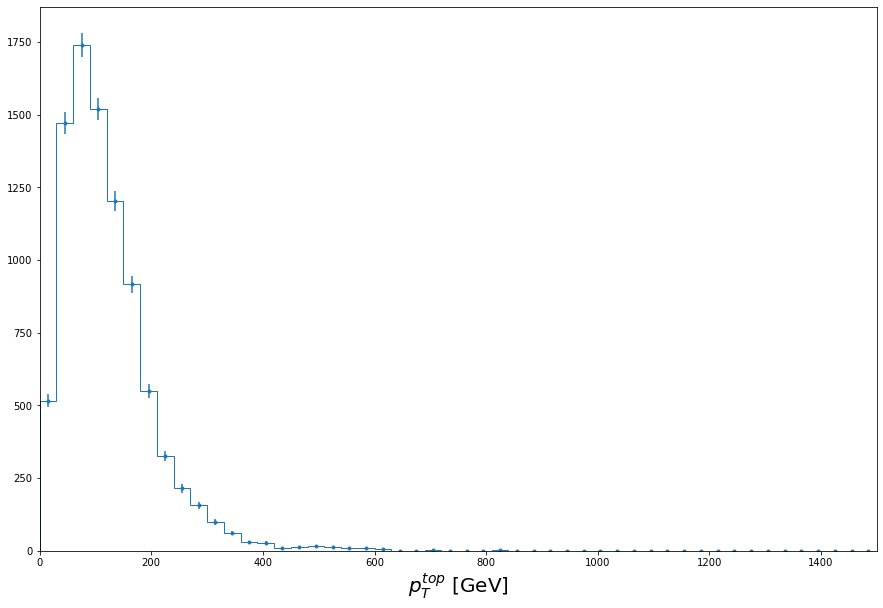

In [27]:
# Plot the gen top PT in the semilep channel
f=plotWithRange(events["Particle.PT"][gen_top1_sel|gen_top2_sel][events["decay_channel"] == 'semilep'].flatten(),50,0,1500,r"$p_T^{top}$ [GeV]")


In [28]:
plotWithRange(events["FatJet.Mass"][gen_top1_sel|gen_top2_sel][events["decay_channel"] == 'semilep'].flatten(),50,0,1500,r"$p_T^{top}$ [GeV]")

ValueError: cannot fit contents of JaggedArray into the given starts and stops arrays

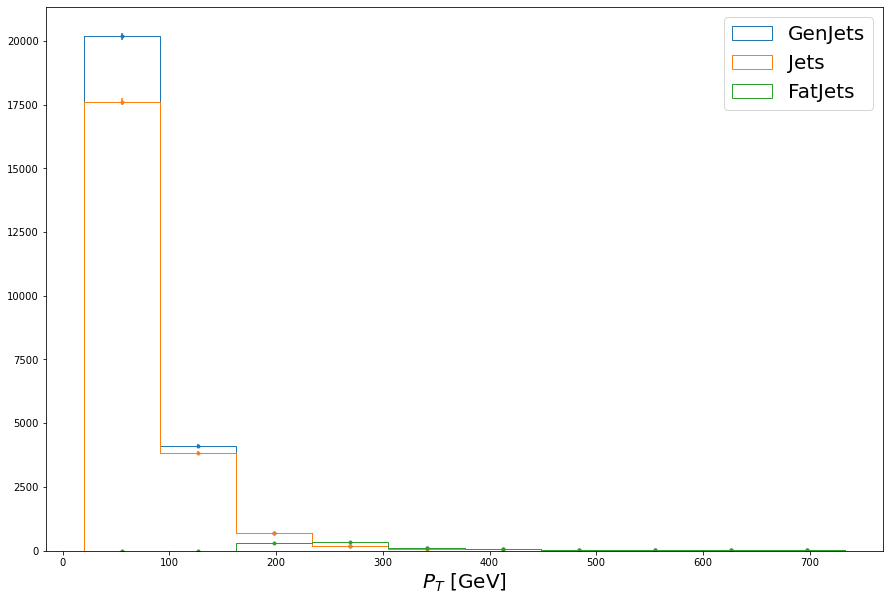

In [29]:
# Plot jets PT
plt.figure(figsize=(15,10))
y, bin_edges,patches = plt.hist((events["GenJet.PT"][events["decay_channel"] == 'semilep']).flatten(), bins=10,histtype="step",label='GenJets')
y2, bin_edges2,patches2 = plt.hist((events["Jet.PT"][events["decay_channel"] == 'semilep']).flatten(), bins=bin_edges,histtype="step",label='Jets')
y3, bin_edges3,patches3 = plt.hist((events["FatJet.PT"][events["decay_channel"] == 'semilep']).flatten(), bins=bin_edges,histtype="step",label='FatJets')
plt.xlabel(r"$P_{T}$ [GeV]",fontsize=20)
#plt.xlim([0,1500])
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(
    bin_centers,
    y,
    yerr = y**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:blue"
)
plt.errorbar(
    bin_centers,
    y2,
    yerr = y2**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:orange"
)
plt.errorbar(
    bin_centers,
    y3,
    yerr = y3**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:green"
)
plt.legend(fontsize=20)
plt.show()

<AxesSubplot:xlabel='Jet multiplicity'>

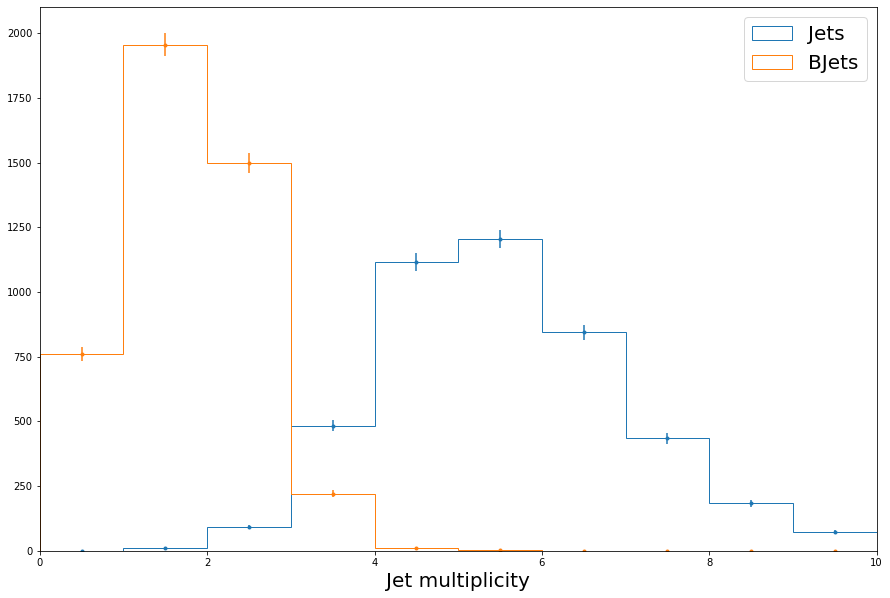

In [30]:
ax = plotWithRange((events["Jet_size"][events["decay_channel"] == 'semilep']).flatten(),10,0,10,r"$n_{Jets}$","Jets")
plotWithRange((events["n_bjets"][events["decay_channel"] == 'semilep']).flatten(),10,0,10,"Jet multiplicity","BJets",ax)

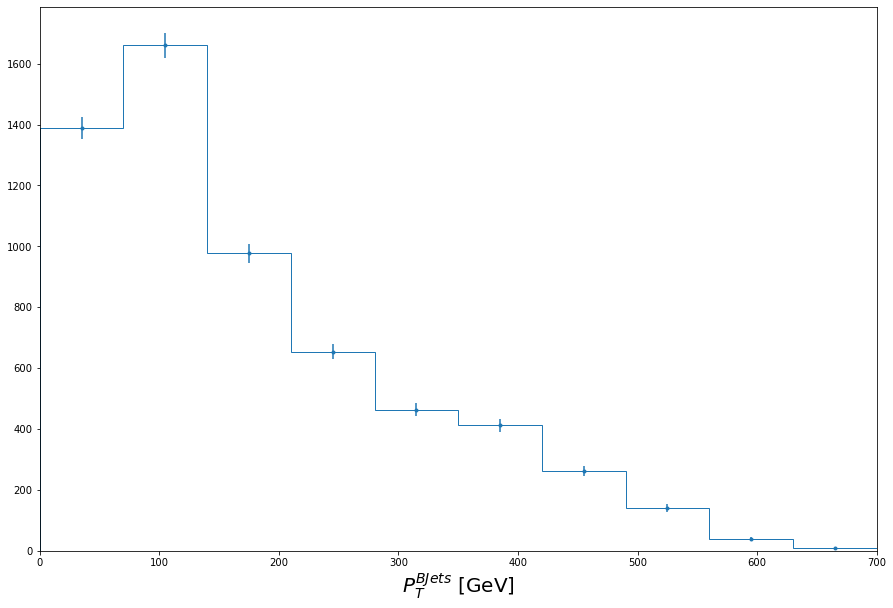

In [57]:
# BTagged Jets phi spectrum
plotWithRange((events["Jet.PT"][events["Jet.BTag"] == True][events["decay_channel"] == 'semilep']).flatten(),10,0,700,r"$P_{T}^{BJets}$ [GeV]")

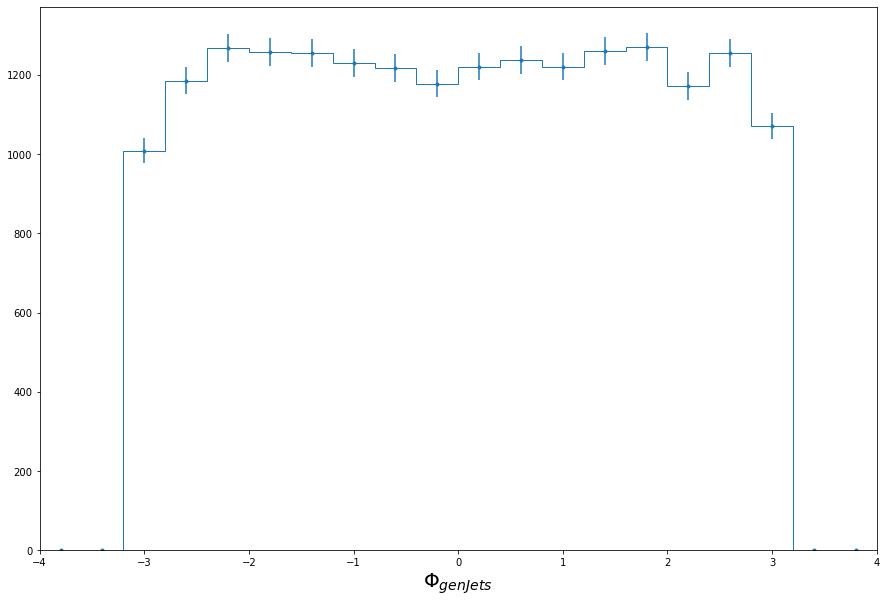

In [42]:
# GenJet phi spectrum
plotWithRange((events["GenJet.Phi"][events["decay_channel"] == 'semilep']).flatten(),20,-4,4,r"$\Phi_{genJets}$")

<AxesSubplot:xlabel='Jet mass'>

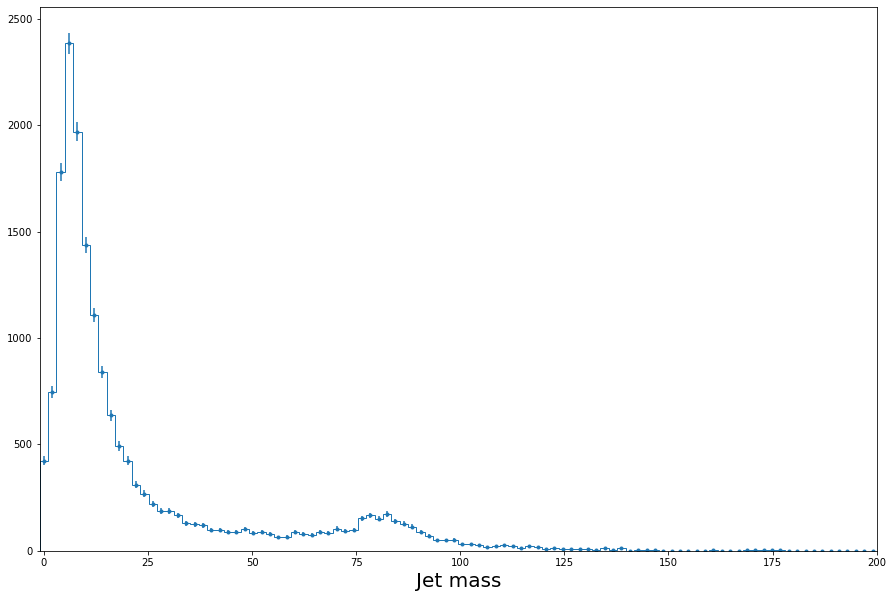

In [21]:
# jet_reconstructed = np.array([len(i) > 0 or len(j) > 0 for i,j in zip(events["FatJet.PT"][events["decay_channel"] == 'semilep'],events["Jet.PT"][events["decay_channel"] == 'semilep'])])
jet_reconstructed = np.array([len(i) > 0 for i in events["Jet.PT"][events["decay_channel"] == 'semilep']])
plotWithRange((events["Jet.Mass"][events["decay_channel"] == 'semilep'][jet_reconstructed]).flatten(),100,-1,200,"Jet mass")

<AxesSubplot:xlabel='FatJet mass [GeV]'>

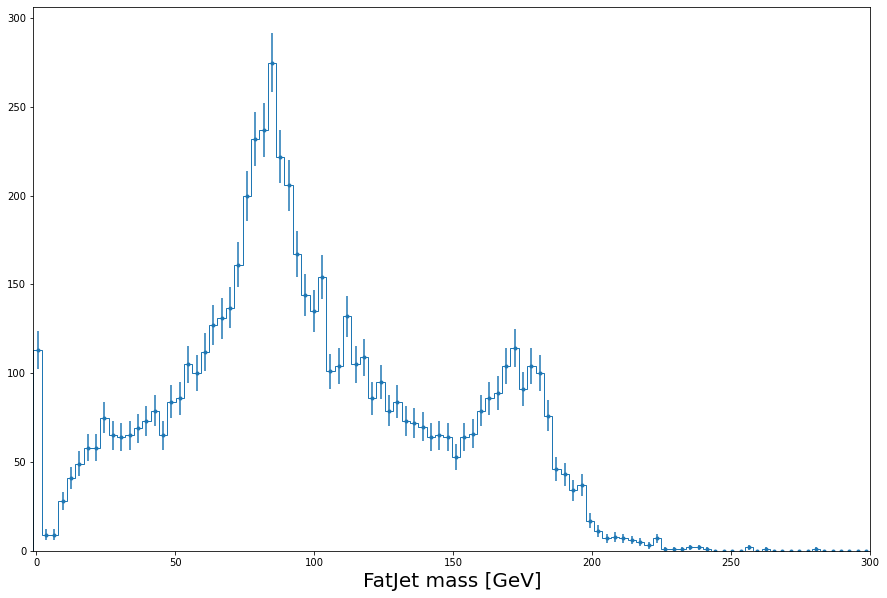

In [25]:
plotWithRange((events["FatJet.Mass"][events["decay_channel"] == 'semilep']).flatten(),100,-1,300,"FatJet mass [GeV]")

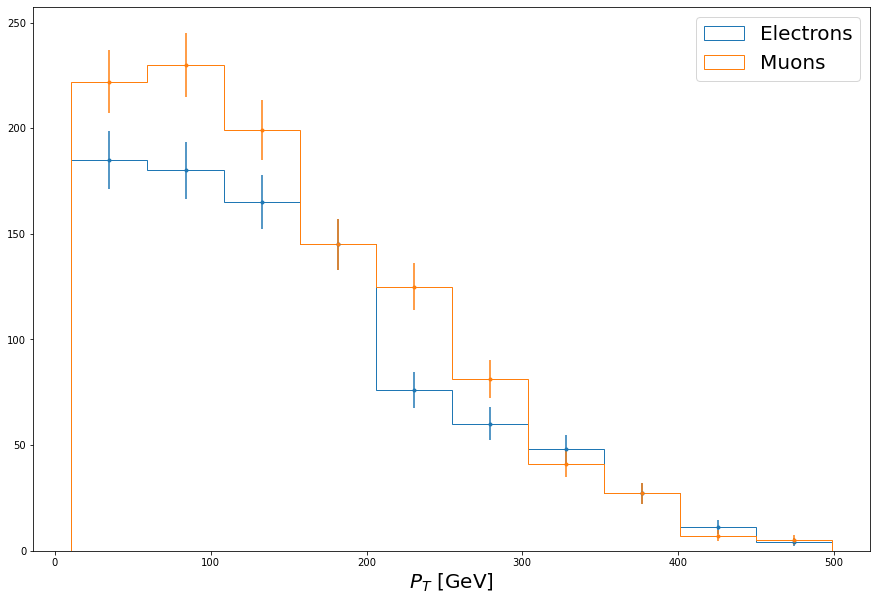

In [49]:
# Plot leptons PT (for events with reconstructed jets)
plt.figure(figsize=(15,10))
y, bin_edges,patches = plt.hist((events["Electron.PT"][events["decay_channel"] == 'semilep'][jet_reconstructed]).flatten(), bins=10,histtype="step",label='Electrons')
y2, bin_edges2,patches2 = plt.hist((events["Muon.PT"][events["decay_channel"] == 'semilep'][jet_reconstructed]).flatten(), bins=bin_edges,histtype="step",label='Muons')
plt.xlabel(r"$P_{T}$ [GeV]",fontsize=20)
#plt.xlim([0,1500])
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(
    bin_centers,
    y,
    yerr = y**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:blue"
)
plt.errorbar(
    bin_centers,
    y2,
    yerr = y2**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:orange"
)
plt.legend(fontsize=20)
plt.show()

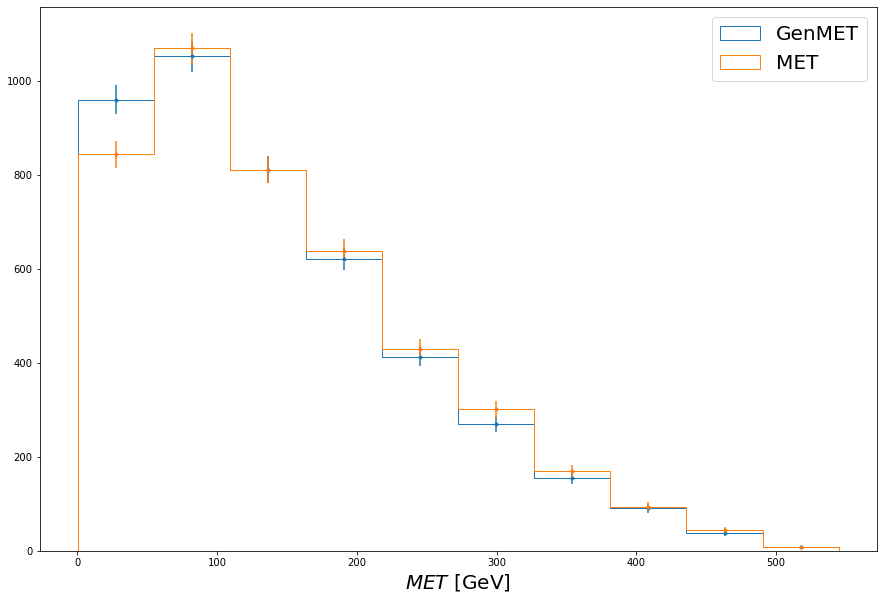

In [50]:
# Plot leptons PT (for events with reconstructed jets)
plt.figure(figsize=(15,10))
y, bin_edges,patches = plt.hist((events["GenMissingET.MET"][events["decay_channel"] == 'semilep'][jet_reconstructed]).flatten(), bins=10,histtype="step",label='GenMET')
y2, bin_edges2,patches2 = plt.hist((events["MissingET.MET"][events["decay_channel"] == 'semilep'][jet_reconstructed]).flatten(), bins=bin_edges,histtype="step",label='MET')
plt.xlabel(r"$MET$ [GeV]",fontsize=20)
#plt.xlim([0,1500])
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(
    bin_centers,
    y,
    yerr = y**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:blue"
)
plt.errorbar(
    bin_centers,
    y2,
    yerr = y2**0.5,
    marker = '.',
    linestyle = 'None',
    drawstyle = 'steps-mid',
    color="tab:orange"
)
plt.legend(fontsize=20)
plt.show()